<a href="https://colab.research.google.com/github/brashi/apresentacoes/blob/main/textoAprRecursao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recursão - Conceitos e aplicações

Texto feito para a seleção da Monitoria ITP/PC, 2021.

Escrito por Lauro Bezerra de Araújo.

A recursão é um valioso recurso na computação, com uma quantidade inimaginável de aplicações e com uma bagagem conceitual bem forte na ciência da computação.

Porém, nada de coisa assustadora aqui ! 

Vamos entender o processo por trás das recursões e em como ele se manifesta em certas aplicações.



---



#Conceito - Funções e recursão

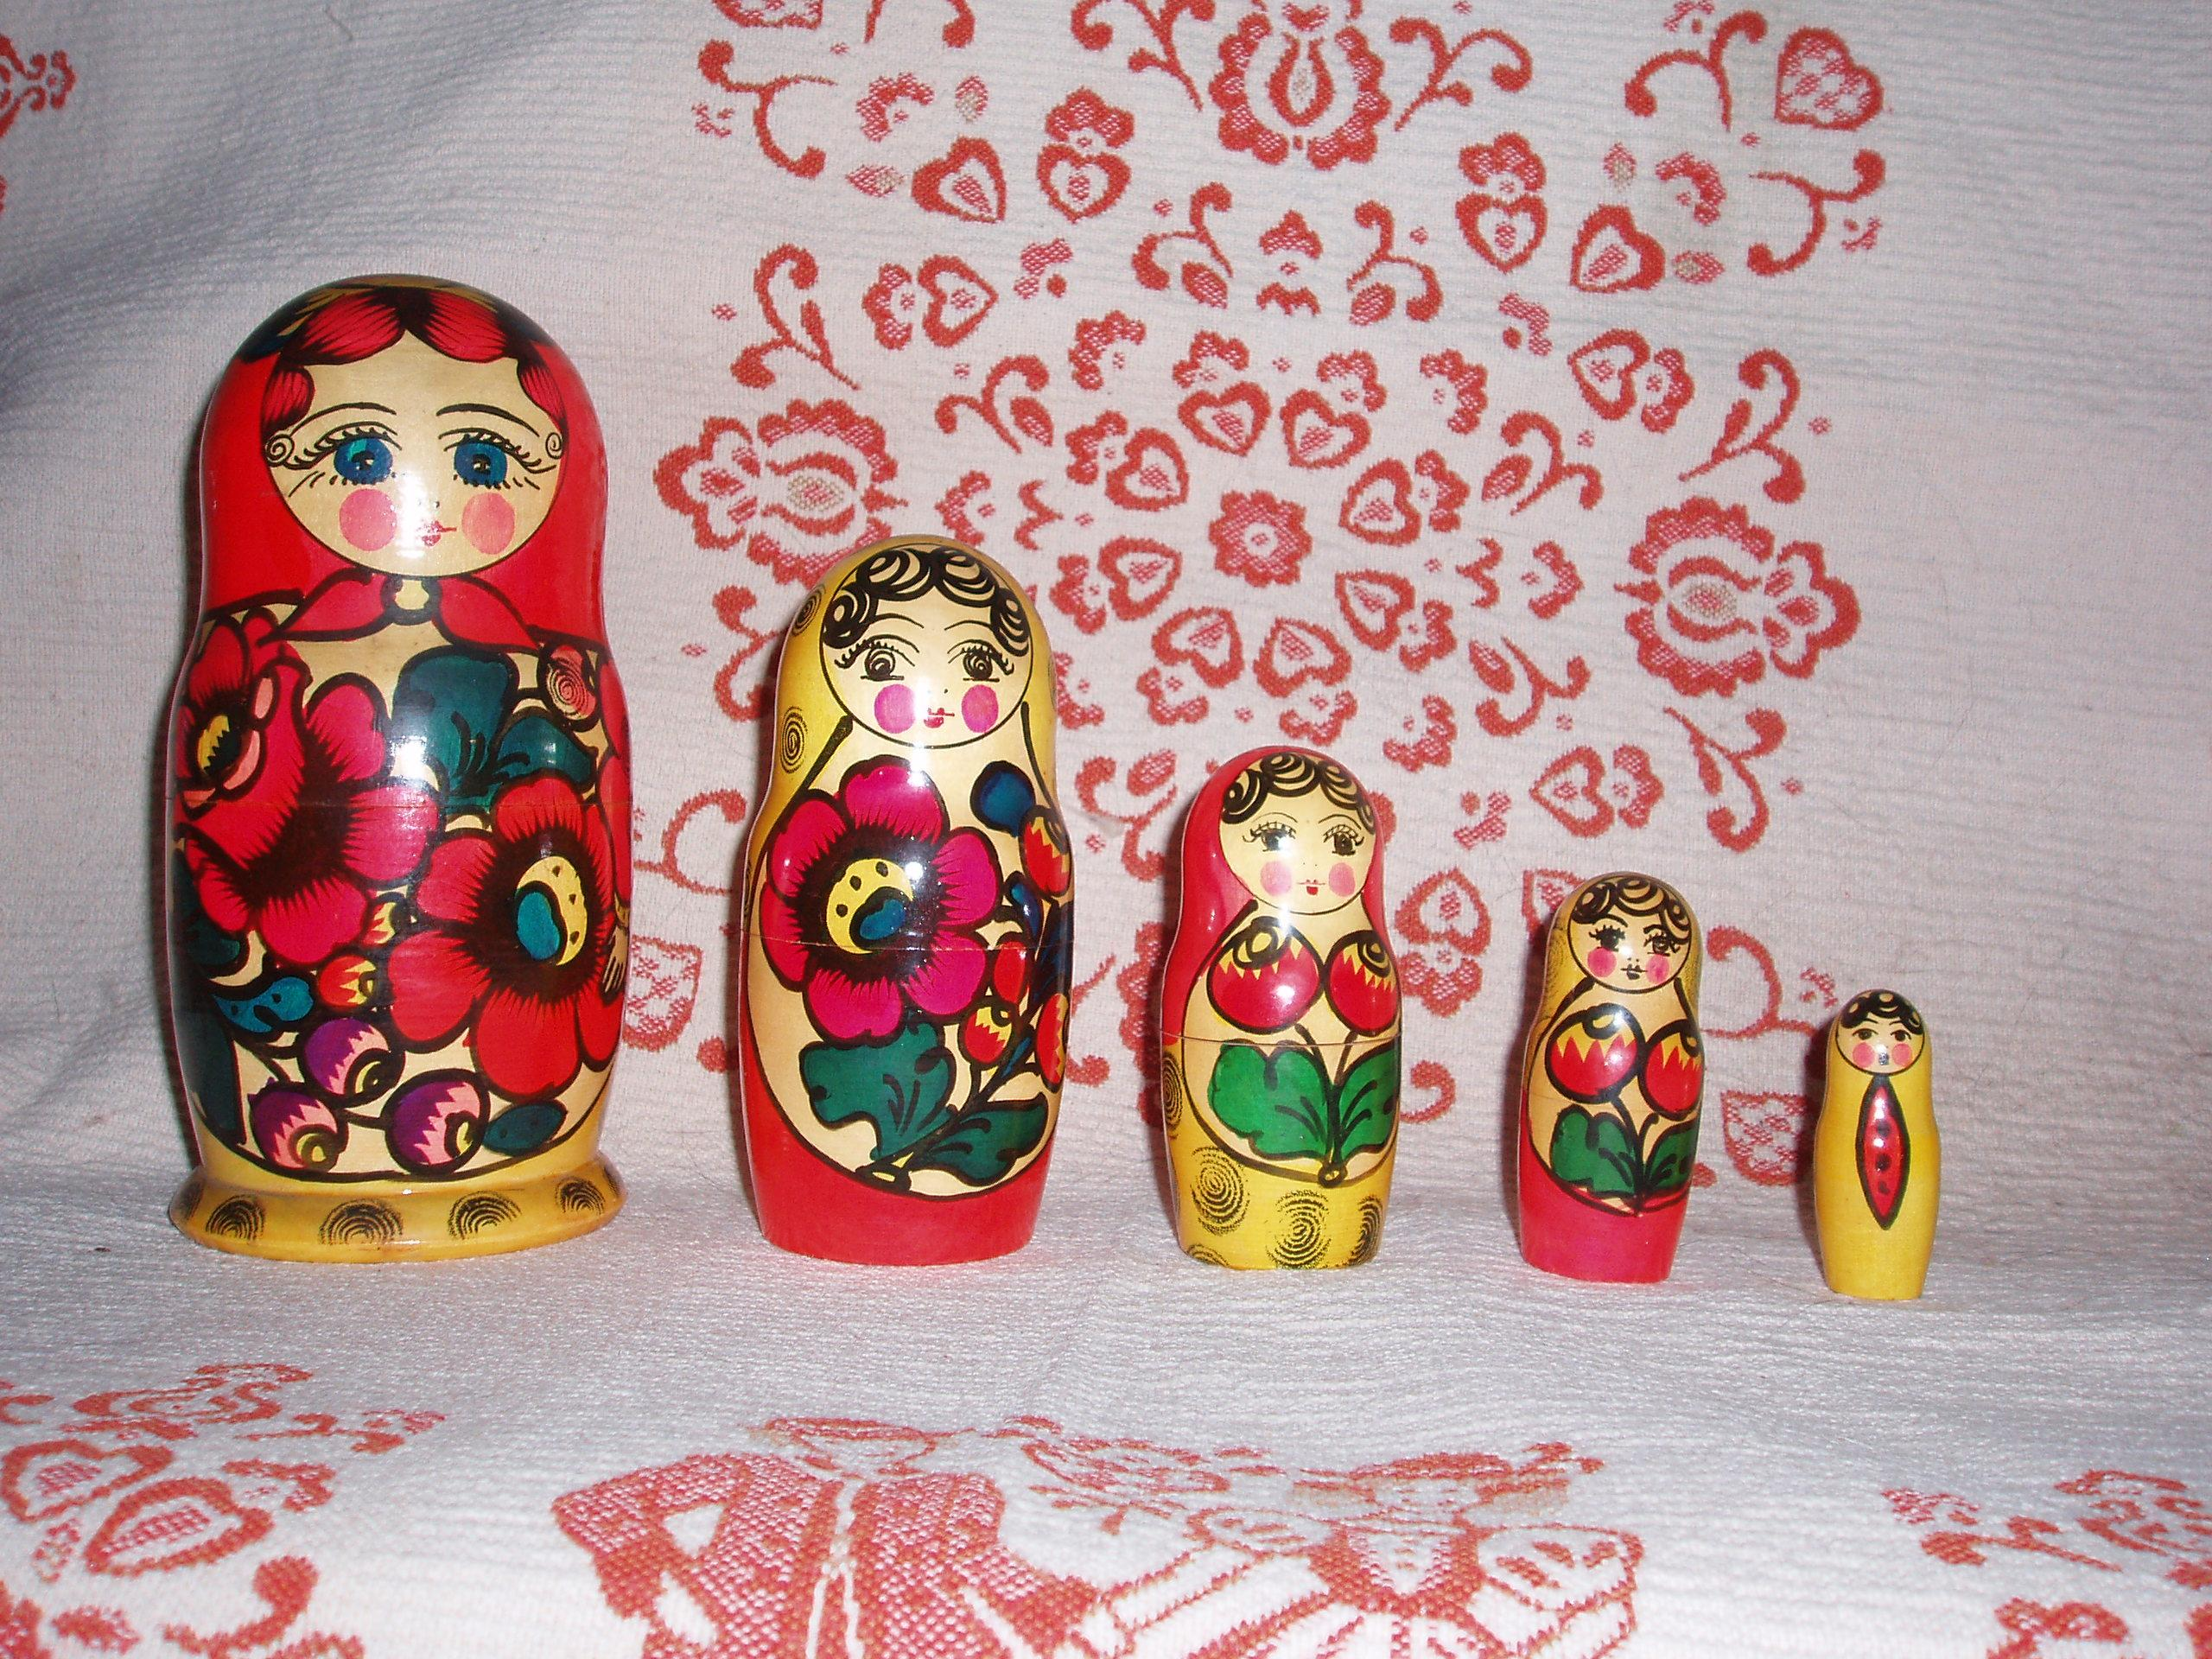



O processo recursivo começa com o que chamamos de **Chamada Recursiva**, onde uma função chama a si mesmo, rodando o mesmo código e seguindo alguns parâmetros. Dividindo o problema em partes menores, este conceito é chamado de **Dividir e conquistar**.

Em especial, pense na recursão como uma forma de dividir problemas em casos menores em que a definição de um caso maior é dado por suas partes menores. Um belo exemplo visto em Matemática Elementar é a Indução matemática :)


Em geral, um algoritmo recursivo seguirá os seguintes parâmetros:

* Uma entrada, que será processada recursivamente
* O caso base ou condição de parada
* A chamada recursiva

Assim, para qualquer processo recursivo vamos ter o nosso **dado** (Entrada), que é processado a cada **chamada** da função até que uma certa **condição** seja atingida.



---



Para um melhor entendimento, vamos ver um exemplo?

##Fatorial - Cálculo de fatorial usando recursão

O cálculo de um fatorial é um exemplo onde temos uma natureza recursiva !

Lembrando a sua definição:

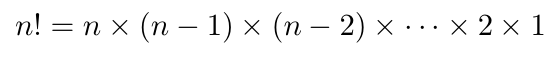

Observe que para qualquer número **n** que queiramos saber, vamos depender de seu antecessor **n - 1** de imediato, que por sua vez vai passar pelo mesmo processo até chegarmos a um número específico conhecido, que neste caso é 1. Temos um processo recursivo !

Vamos ver em código ?



In [ ]:
def fatorial(n):
  if (n == 1):
    return 1;
  else:
    return n * fatorial(n - 1)


#Quero fatorial de 6.
print("4! = ", fatorial(4))
print("5! = ", fatorial(5))
print("6! = ", fatorial(6))

4! =  24
5! =  120
6! =  720




---



Observe que, após a chamada inicial para o fatorial de 4, vamos ter os seguintes retornos:

```py
fatorial(4) = 4 * fatorial(3)
  -> fatorial(3) = 3 * fatorial(2)
    -> fatorial(2) = 2 * fatorial(1)
      -> fatorial(1) = 1
```

Agora, observe que chegamos ao caso base temos o retorno de cada chamada:

```py
fatorial(2) = 2 * 1
  -> fatorial(3) = 3 * 2
    -> fatorial(4) = 4 * 6

fatorial(4) = 24
```

A definição do nosso fatorial é dada pelo seu antecessor, e que por sua vez em **código** é feita pela definição por chamadas até que se encontre **n = 1**, acabando a recursão e definindo os valores para fatorial(n).

O mesmo é definido para n = 5 ou n = 6, usando o mesmo processo. Veja que as chamadas de função sempre vão até 1, e vão retornar a multiplicação do valor até chegar ao valor **n** definido.

### Código em C


```c
#include <stdio.h>

int fatorial(int n) {
	if(n == 1) {
		return 1;
	} else {
		return fatorial(n - 1) * n;
	}
}

int main(int argc, char* argv[]) {

	printf("4! = %d\n", fatorial(4));
	printf("5! = %d\n", fatorial(5));
	printf("6! = %d\n", fatorial(6));

	return 0;
}
```





---



# Campo minado e recursão !

A questão a ser vista a luz da recursão é o famoso **Campo minado** (aquele mesmo que você jogava no Windows XP). O algoritmo por trás do jogo, que pode ser visto [Aqui](https://minesweeper.online/pt/) é uma ótima oportunidade de apresentarmos o processo de recursão, e agora vamos destrinchar os conceitos  dentro dele e ainda apresentando a aplicação direta do processo recursivo :)



---



## Conceitualização



Inicialmente, vamos dar uma olhada no que acontece quando interagimos com uma célula no campo minado.

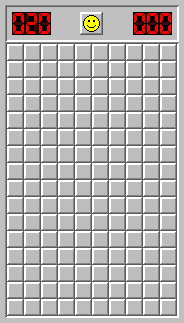

Ao clicar na célula, 3 coisas que podem acontecer:
  * Explodiu ! Clicou em uma bomba :(
  * A célula vai indicar a quantidade de bombas na sua vizinhaça
  * **Ela vai abrir células ao seu redor**


O processo de *'Abrir'* células ao redor é **recursivo**, veja como o mesmo ocorre para cada célula vazia envolta da primeira célula, repetindo o processo até chegar em uma bomba, onde a célula irá indicar o número de bombas ao seu redor.



---



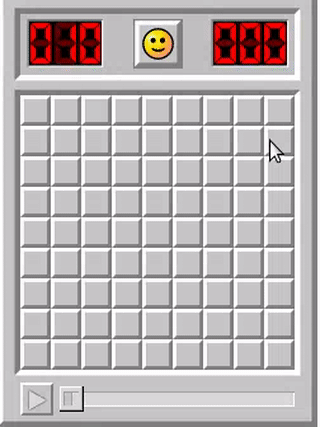

Veja como podemos descrever o algoritmo de quando clicamos em uma célula da seguinte maneira:

  * Se a célula for uma bomba, **Gamer Over**.
  * Se não for uma bomba, verifique as células ao redor por bombas e tenha o seu valor igual ao número de bombas.
  * Se não encontrou bombas na vizinhaça, repita o processo para cada célula ao seu redor.


Agora, note como o processo de encontrar bombas é uma recursão. Onde a chamada recursiva ocorre quando **repetimos** a mesma função para as outras células (sem achar bombas envolta), e a condição de parada é quando a célula **encontra bombas** em sua vizinhaça ou quando atinge uma parede.



---



Vendo de perto, o que acontece após o clique, ilustrado pelo **ponto em preto**:

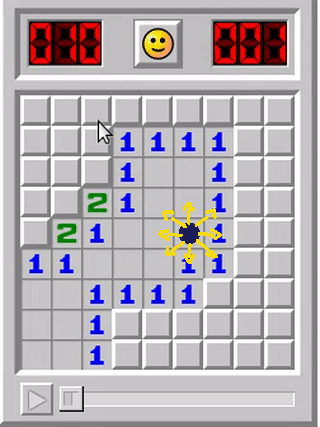

Como a célula clicada não possui bomba e também não tem vizinhos com bomba, ele vai realizar a chamada da função **recursivamente** para as suas células vizinhas, **indicado pelas setas em amarelo**.

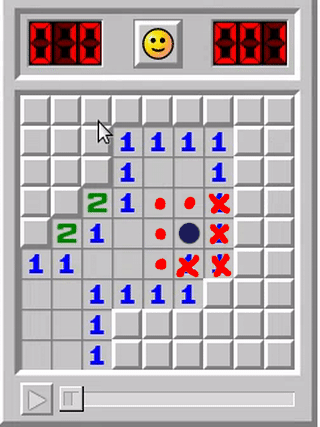

Em questão de funções, considerando abrirCampo(linha, coluna) como assinatura, temos:
```py
abrirCampo(5,6) = Sem bombas
  -> abrirCampo(4, 5) #Chamando a função para o canto superior esquerdo
  -> abrirCampo(4, 6) #Chamando a função para a célula acima
  -> abrirCampo(4, 7) #Chamando a função para o canto superior direito
  -> abrirCampo(4, 6) #Chamando a função para a célula a esquerda

    [...]

```

Então, cada célula vazia (sem bomba e sem vizinhos com bombas) representadas pelos **pontos vermelhos**, vão repetir o processo com seus respectivos vizinhos, realizando a **chamada recursiva**.

E, as células que apresentarem vizinhos com bombas, representadas pelos **x em vermelho**, estão em uma **condição de parada** e não vão realizar chamadas de função.

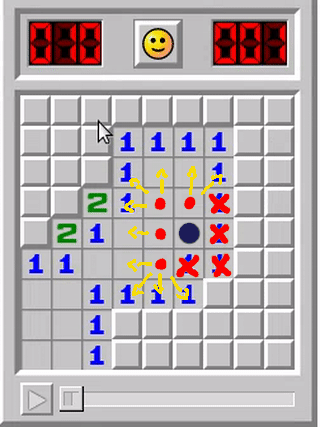


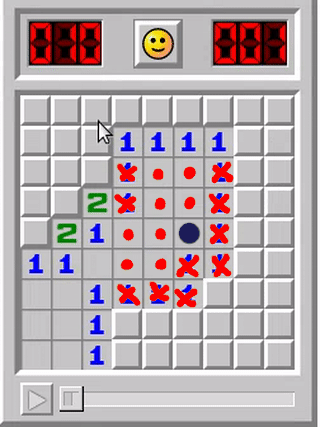


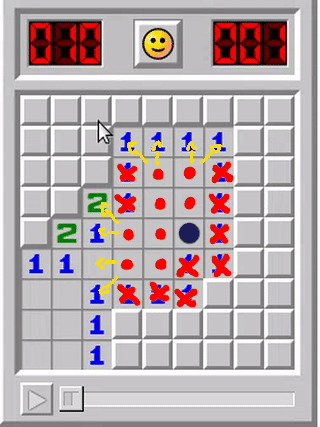

Assim, o processo segue de forma **recursiva** até que não tenha mais *'saídas'*, ou seja, não se encontra mais células vazias e chegamos ao final da recursão.



---



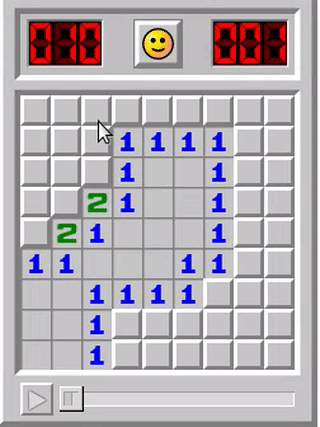



---



## Aplicação em código

Agora vamos ver como é feito esse processo recursivo em código C. Em especial, apresentar quais partes do código se relacionam a recursão.

Vamos começar:

```c
int abrirCampo(char **campoReal, char **campo, int l, int c) {
  int bombas = 0;
  if(campo[l][c] != '*')
    return 0;

  if(campoReal[l][c] == 'B'){
    campo[l][c] = 'X';
    return 1;

  } else{

    [...]

```

Inicialmente é testado os casos onde a célula já foi *'clicada'* e já passou pela função. Além do caso em que a célula seja uma bomba, que neste caso ela é marcada com 'X' e a função retorna 1, dando **Game Over**.

A seguir...

```c
 else {
    bombas = procurarMinas(campoReal, l, c);
    campo[l][c] = bombas + '0';
    if(bombas == 0) {
      //Canto superior esquerdo
      if(campoReal[l-1][c-1] == '*') abrirCampo(campoReal, campo, l-1, c-1);
      //Em cima
      if(campoReal[l-1][c] == '*') abrirCampo(campoReal, campo, l-1, c);
      //Canto superior direito
      if(campoReal[l-1][c+1] == '*') abrirCampo(campoReal, campo, l-1, c+1);
      //Esquerda
      if(campoReal[l][c-1] == '*') abrirCampo(campoReal, campo, l, c-1);
      //Direita
      if(campoReal[l][c+1] == '*') abrirCampo(campoReal, campo, l, c+1);
      //Canto inferior esquerdo
      if(campoReal[l+1][c-1] == '*') abrirCampo(campoReal, campo, l+1, c-1);
      //Embaixo
      if(campoReal[l+1][c] == '*') abrirCampo(campoReal, campo, l+1, c);
      //Canto inferior direito
      if(campoReal[l+1][c+1] == '*') abrirCampo(campoReal, campo, l+1, c+1);

    }
    return 0;
  }

}

```

Chegamos a nossa chamada recursiva !

Observe que, inicialmente é verificado se `bombas == 0`, dado pela função `procurarMinas(campoReal, linha, coluna`, que retorna a quantidade de minas nas células vizinhas da posição dada. O parâmetro de `bombas` é importante por categorizar a **condição de parada** da nossa recursão.

Então, é feita a chamada para cada célula vizinha válida ao redor. Veja como é feito no total oito chamadas, uma para cada vizinho.


Podemos então concluir que a **condição de parada** é a contagem da variável `bombas`, e o processo recursivo é dado pela **chamada da função** para as células vizinhas. Além do processamento, que a indicação de valor da célula (vazia, ou número de bombas), finalizando assim a definição da nossa recursão.

### Código completo da recursão



```c
int procurarMinas(char **campoReal, int l, int c) {
  int i, j;
  int bombas = 0;
  //Checando envolta de uma célula por bombas!
  if(campoReal[l-1][c-1] == 'B') bombas++; //Canto superior esquerdo
  if(campoReal[l-1][c] == 'B') bombas++; //Em cima
  if(campoReal[l-1][c+1] == 'B') bombas++; //Canto superior direito
  if(campoReal[l][c-1] == 'B') bombas++; //Esquerda
  if(campoReal[l][c+1] == 'B') bombas++; //Direita
  if(campoReal[l+1][c-1] == 'B') bombas++; //Canto inferior esquerdo
  if(campoReal[l+1][c] == 'B') bombas++; //Abaixo
  if(campoReal[l+1][c+1] == 'B') bombas++; //Canto inferior direito

  return bombas;
}

//Função recursiva para abrir o campo.
int abrirCampo(char **campoReal, char **campo, int l, int c) {
  int bombas = 0;
  if(campo[l][c] != '*')
    return 0;

  if(campoReal[l][c] == 'B') {
    campo[l][c] = 'X';
    return 1;
  } else {
    bombas = procurarMinas(campoReal, l, c);
    campo[l][c] = bombas + '0';
    if(bombas == 0){
      //Canto superior esquerdo
      if(campoReal[l-1][c-1] == '*') abrirCampo(campoReal, campo, l-1, c-1);
      //Em cima
      if(campoReal[l-1][c] == '*') abrirCampo(campoReal, campo, l-1, c);
      //Canto superior direito
      if(campoReal[l-1][c+1] == '*') abrirCampo(campoReal, campo, l-1, c+1);
      //Esquerda
      if(campoReal[l][c-1] == '*') abrirCampo(campoReal, campo, l, c-1);
      //Direita
      if(campoReal[l][c+1] == '*') abrirCampo(campoReal, campo, l, c+1);
      //Canto inferior esquerdo
      if(campoReal[l+1][c-1] == '*') abrirCampo(campoReal, campo, l+1, c-1);
      //Embaixo
      if(campoReal[l+1][c] == '*') abrirCampo(campoReal, campo, l+1, c);
      //Canto inferior direito
      if(campoReal[l+1][c+1] == '*') abrirCampo(campoReal, campo, l+1, c+1);
    }
    return 0;
  }

}
```

